2) A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.

In [1]:
#Upload file to google colab
from google.colab import files
uploaded = files.upload()

Saving palm_ffb.csv to palm_ffb.csv


In [2]:
#Load CSV file
import pandas as pd
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
set_option('display.width', 120)
filename ="palm_ffb.csv"
data = pd.read_csv(filename)
print(data.head)

<bound method NDFrame.head of            Date  SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  Working_days  HA_Harvested  FFB_Yield
0    01.01.2008         616.4     25.306452      21.3      32.2          184.4            25   777778.3951       1.62
1    01.02.2008         568.9     26.165517      20.9      35.1          140.2            23   767988.2759       1.45
2    01.03.2008         577.6     25.448387      21.3      32.9          280.4            25   783951.9231       1.56
3    01.04.2008         581.1     26.903333      20.6      34.8          173.3            25   788987.0504       1.39
4    01.05.2008         545.4     27.241935      20.9      35.0          140.6            25   813659.7222       1.44
..          ...           ...           ...       ...       ...            ...           ...           ...        ...
125  01.06.2018         498.2     27.213333      21.6      33.6          165.6            24   820758.9147       1.29
126  01.07.2018         49

In [3]:
#Check the datatype and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
#Feature of attribute
from pandas import set_option
set_option('display.width', 100)
set_option('precision',3)
set_option('display.max_columns',None)
description = data.describe()
description

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
mean,527.647,26.850,21.379,33.852,188.981,24.754,793404.492,1.602
std,57.368,0.651,0.689,1.080,80.237,1.239,34440.894,0.282
min,380.700,25.158,18.900,31.100,2.000,21.000,683431.944,1.080
25%,488.625,26.442,21.000,33.100,140.300,24.000,768966.949,1.390
50%,538.300,26.931,21.500,33.900,182.150,25.000,790036.158,1.585
75%,571.025,27.271,21.800,34.600,226.100,26.000,821989.235,1.808
max,647.300,28.580,22.600,36.000,496.100,27.000,882254.225,2.270


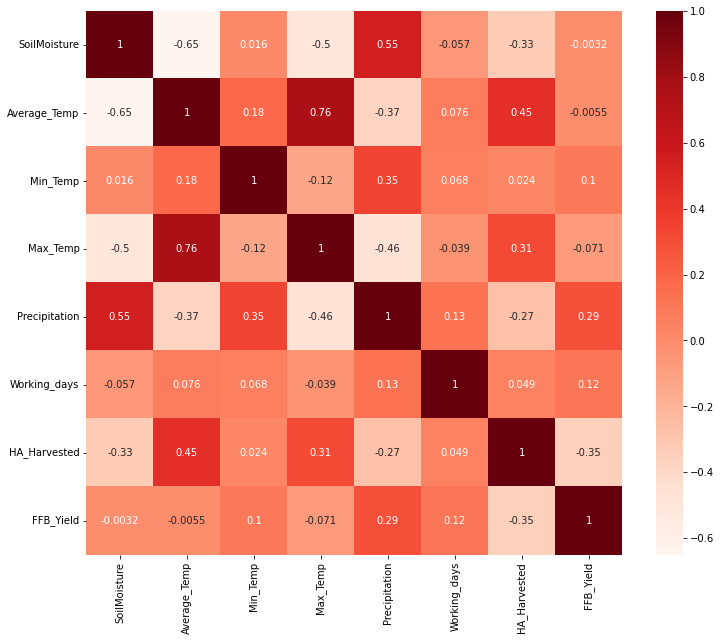

In [5]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Skew for each attributes
skew = data.skew()
skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


SoilMoisture    -0.394
Average_Temp    -0.341
Min_Temp        -1.121
Max_Temp        -0.216
Precipitation    0.526
Working_days    -0.661
HA_Harvested    -0.064
FFB_Yield        0.189
dtype: float64

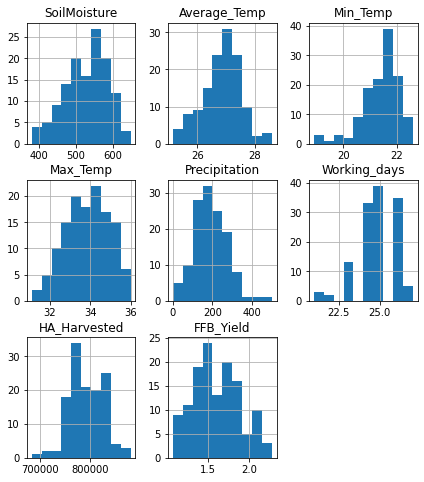

In [7]:
#Histograms
data.hist(figsize =(7,8))
pyplot.show()

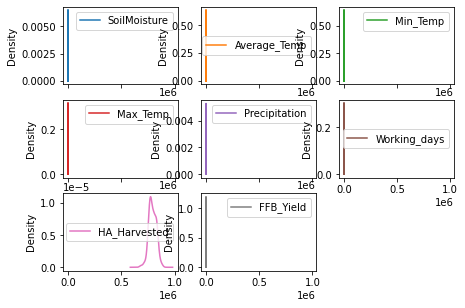

In [8]:
#Density Plots
data.plot(kind='density', figsize=(7,10), subplots=True, layout=(6,3))
pyplot.show()

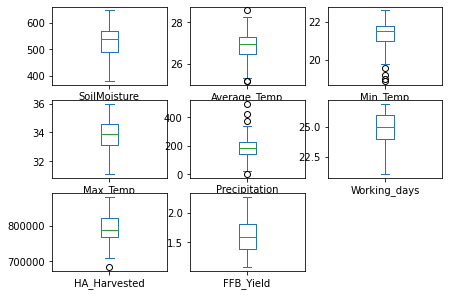

In [9]:
#Box and Whisker Plots
data.plot(kind='box', figsize=(7,10), subplots=True, layout=(6,3))
pyplot.show()

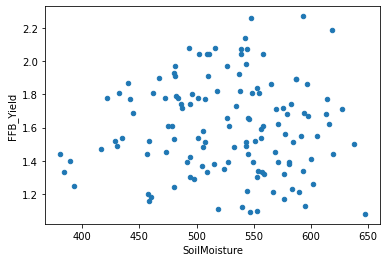

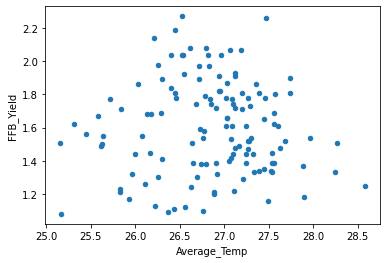

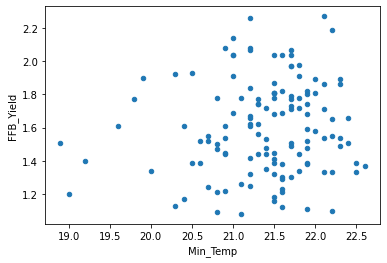

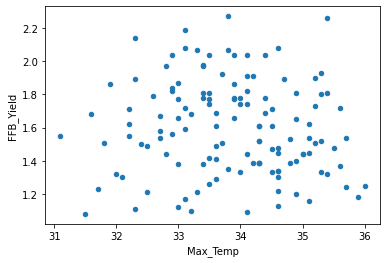

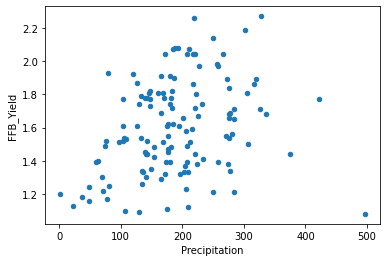

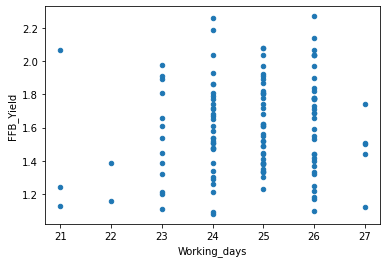

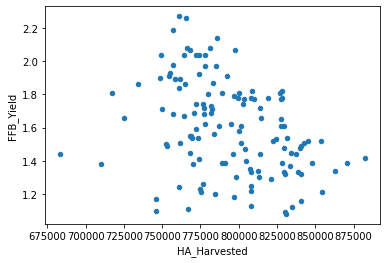

In [10]:
#Plot scatter graph
data.plot(x="SoilMoisture", y="FFB_Yield", kind="scatter")
data.plot(x="Average_Temp", y="FFB_Yield", kind="scatter")
data.plot(x="Min_Temp", y="FFB_Yield", kind="scatter")
data.plot(x="Max_Temp", y="FFB_Yield", kind="scatter")
data.plot(x="Precipitation", y="FFB_Yield", kind="scatter")
data.plot(x="Working_days", y="FFB_Yield", kind="scatter")
data.plot(x="HA_Harvested", y="FFB_Yield", kind="scatter")

In [11]:
#Correlation with output variable
cor_target = abs(cor["FFB_Yield"])
#Selecting highly correlated features > 0.0
relevant_features = cor_target[cor_target> 0.0]
relevant_features

SoilMoisture     0.003
Average_Temp     0.005
Min_Temp         0.104
Max_Temp         0.071
Precipitation    0.290
Working_days     0.116
HA_Harvested     0.350
FFB_Yield        1.000
Name: FFB_Yield, dtype: float64

In [12]:
#Correlation with output variable
cor_target = abs(cor["FFB_Yield"])
#Selecting highly correlated features > 0.1
relevant_features = cor_target[cor_target> 0.1]
relevant_features

Min_Temp         0.104
Precipitation    0.290
Working_days     0.116
HA_Harvested     0.350
FFB_Yield        1.000
Name: FFB_Yield, dtype: float64

In [13]:
#Correlation with output variable
cor_target = abs(cor["FFB_Yield"])
#Selecting highly correlated features > 0.2 (Strong correlation)
relevant_features = cor_target[cor_target> 0.2]
relevant_features

Precipitation    0.29
HA_Harvested     0.35
FFB_Yield        1.00
Name: FFB_Yield, dtype: float64

Answer: <br>
1. Precipitation has a strong positive correlation with FFB_Yield. 
<br>
2. Min_Temp and Working_days have a weak positive correlation with FFB_Yield. 
<br>
3. HA_Harvested has a strong negative correlation with FFB_Yield. 
<br>
4. SoilMoisture, Average_Temp and Max_Temp have a weak negative correlation with FFB_Yield.
<br>